In [2]:
#cd ..

/Users/miafryer/Documents/flatiron/pneumonia_CT_scan


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model

In [5]:
normal_total = glob.glob("data/NORMAL/*.jpeg")
pneumonia_total = glob.glob("data/PNEUMONIA/*.jpeg")

number_of_normal_img = len(normal_total)
number_of_pneumonia_img = len(pneumonia_total)
print("number of normal images:", number_of_normal_img)
print("number of pneumonia images:", number_of_pneumonia_img)

number of normal images: 1583
number of pneumonia images: 4273


<AxesSubplot:>

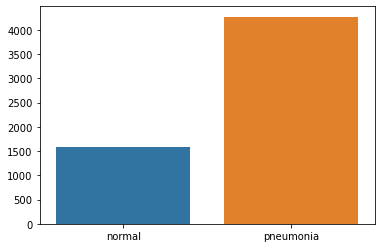

In [6]:
sns.barplot(x=['normal','pneumonia' ] , y=[number_of_normal_img, number_of_pneumonia_img] )

In [33]:
normal_total = glob.glob("data/NORMAL/*.jpeg")
pneumonia_virus = glob.glob("data/VIRUS/*.jpeg")
pneumonia_bacteria = glob.glob("data/BACTERIA/*.jpeg")

number_of_normal_img = len(normal_total)
number_of_virus_img = len(pneumonia_virus)
number_of_bacteria_img = len(pneumonia_bacteria)
print("number of normal images:", number_of_normal_img)
print("number of virus images:", number_of_virus_img )
print("number of bacteria images:", number_of_bacteria_img)


number of normal images: 1583
number of virus images: 1493
number of bacteria images: 2780


<AxesSubplot:>

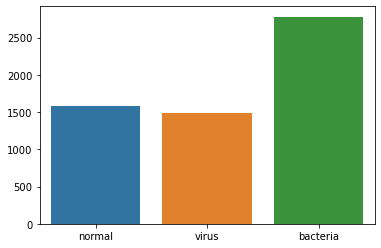

In [34]:
sns.barplot(x=['normal','virus', 'bacteria' ] , y=[number_of_normal_img, number_of_virus_img, number_of_bacteria_img] )

In [7]:
train_path = "data/split/train/"
test_path = "data/split/test/"
val_path = "data/split/val/"

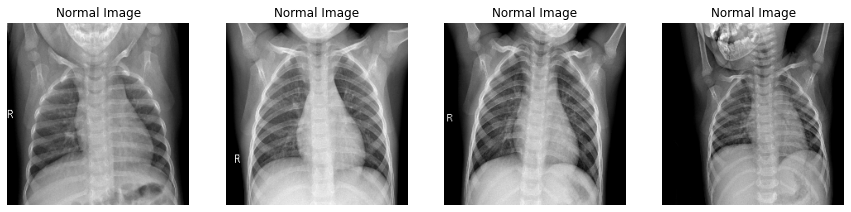

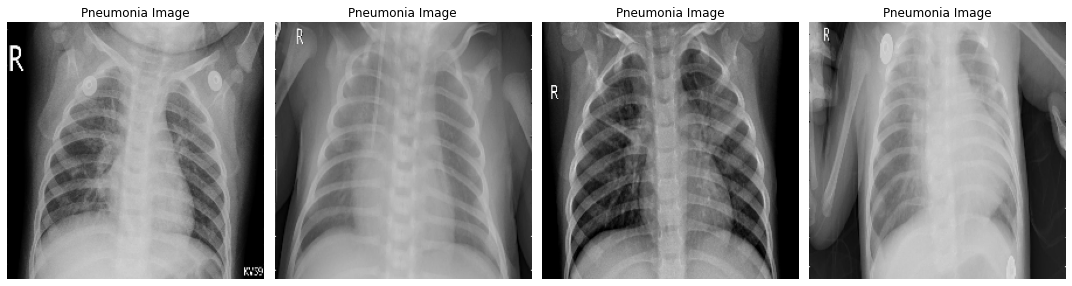

In [8]:

normal = glob.glob(train_path+"NORMAL/*.jpeg")
pneumonia = glob.glob(train_path+"PNEUMONIA/*.jpeg")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Normal Image")
fig.tight_layout()       
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Pneumonia Image")
fig.tight_layout()    
plt.show()


## Base CNN

In [9]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path , 
        target_size=(64, 64), batch_size = 180, class_mode='binary') 

Found 3514 images belonging to 2 classes.


In [10]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 180,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

Found 1170 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [13]:
history_base = model.fit(train_generator, 
                                epochs=10, 
                                validation_data=val_generator)

Epoch 1/10
20/20 [==============================] - 32s 2s/step - loss: 0.5785 - acc: 0.7297 - val_loss: 0.5731 - val_acc: 0.7295
Epoch 2/10
20/20 [==============================] - 32s 2s/step - loss: 0.5710 - acc: 0.7297 - val_loss: 0.5650 - val_acc: 0.7295
Epoch 3/10
20/20 [==============================] - 31s 2s/step - loss: 0.5618 - acc: 0.7297 - val_loss: 0.5540 - val_acc: 0.7295
Epoch 4/10
20/20 [==============================] - 30s 2s/step - loss: 0.5511 - acc: 0.7297 - val_loss: 0.5413 - val_acc: 0.7295
Epoch 5/10
20/20 [==============================] - 31s 2s/step - loss: 0.5364 - acc: 0.7297 - val_loss: 0.5265 - val_acc: 0.7295
Epoch 6/10
20/20 [==============================] - 32s 2s/step - loss: 0.5208 - acc: 0.7297 - val_loss: 0.5042 - val_acc: 0.7295
Epoch 7/10
20/20 [==============================] - 31s 2s/step - loss: 0.5125 - acc: 0.7436 - val_loss: 0.4855 - val_acc: 0.7449
Epoch 8/10
20/20 [==============================] - 31s 2s/step - loss: 0.4706 - acc: 0.75

In [ ]:
#model.save('base_cnn__model.h5')

In [14]:
test_x, test_y = next(test_generator)

In [15]:
results_test = model.evaluate(test_x, test_y)

6/6 [==============================] - 0s 16ms/step - loss: 0.4600 - acc: 0.8778


In [16]:
#result in the probability of each target class for that specific image
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Generated 1170 predictions


In [18]:
#model = load_model('base_model.h5') 
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

## Transfer Learning ResNet50V2 + Image Augumentation 

In [19]:
train_generator2 = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.3)
val_generator2 = ImageDataGenerator(rescale=1./255)
test_generator2 = ImageDataGenerator(rescale=1./255)

In [20]:
train2 = train_generator2.flow_from_directory(train_path,
                                               batch_size=128,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42,
                                               subset="training")

Found 3514 images belonging to 2 classes.


In [21]:
val2 = val_generator2.flow_from_directory(val_path,
                                               batch_size=4,
                                               target_size=(220,220),
                                               color_mode="rgb",
                                               class_mode="binary",
                                               shuffle=True,
                                               seed=42)

Found 1172 images belonging to 2 classes.


In [22]:
test2 = test_generator2.flow_from_directory(test_path,
                                          batch_size=32,
                                          target_size=(220,220),
                                          color_mode="rgb",
                                          class_mode="binary")

Found 1170 images belonging to 2 classes.


In [23]:
resnet50 = ResNet50V2(weights = "imagenet", input_shape = (220,220,3), include_top = False)

In [24]:
model2 = Sequential()

model2.add(resnet50)    
model2.add(Flatten())
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dropout(0.5))

model2.add(Dense(units = 1, activation = "sigmoid"))

In [25]:
resnet50.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model2.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model2.trainable_weights))

resnet50v2 False
flatten_1 True
dense_2 True
dropout True
dense_3 True
4


In [26]:
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
hist2 = model2.fit(train2,validation_data=val2,epochs=5)

Epoch 1/5
28/28 [==============================] - 405s 14s/step - loss: 4.1061 - accuracy: 0.7836 - val_loss: 0.2278 - val_accuracy: 0.9292
Epoch 2/5
28/28 [==============================] - 389s 14s/step - loss: 0.2021 - accuracy: 0.9239 - val_loss: 0.1611 - val_accuracy: 0.9411
Epoch 3/5
28/28 [==============================] - 390s 14s/step - loss: 0.2101 - accuracy: 0.9224 - val_loss: 0.1981 - val_accuracy: 0.9181
Epoch 4/5
28/28 [==============================] - 384s 14s/step - loss: 0.1667 - accuracy: 0.9426 - val_loss: 0.1496 - val_accuracy: 0.9428
Epoch 5/5
28/28 [==============================] - 399s 15s/step - loss: 0.1429 - accuracy: 0.9371 - val_loss: 0.1799 - val_accuracy: 0.9428


In [ ]:
#model2.save('ResNet50_cnn__model.h5')

In [28]:
test_results2 = model2.evaluate(test2)

37/37 [==============================] - 83s 2s/step - loss: 0.1712 - accuracy: 0.9564


In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 36,410,113
Trainable params: 12,845,313
Non-trainable params: 23,564,800
_________________________________________________________________


In [30]:
tf.keras.utils.plot_model(
    model, to_file='model1.png', show_layer_names=True, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


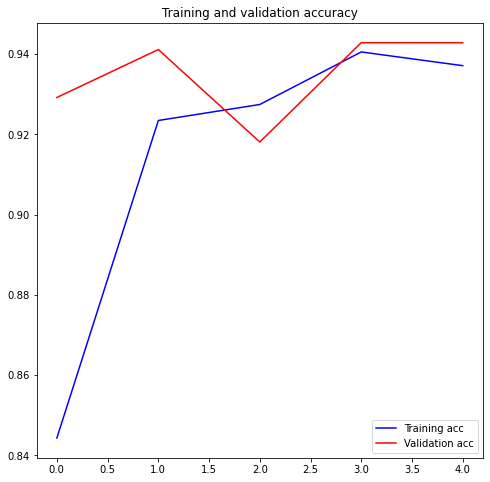

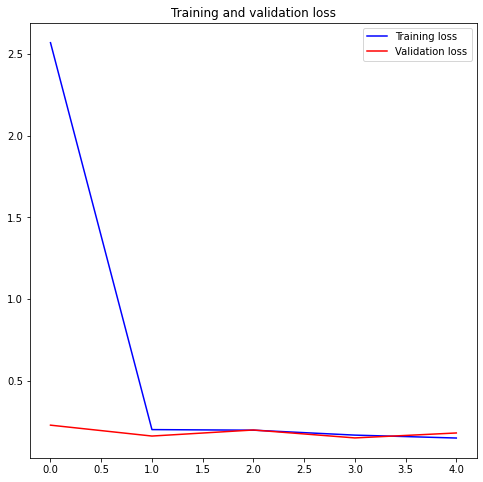

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(len(acc))
plt.figure(figsize=(8,8))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
y_hat_test = model2.predict_generator(test_generator2)

ValueError: Failed to find data adapter that can handle input: <class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>

## Transfer Learning VGG19 + Image Augumentation 

In [ ]:
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

model3 = models.Sequential()
model3.add(cnn_base)    
model3.add(Flatten())
model3.add(Dense(units = 128, activation = "relu"))
model3.add(Dropout(0.5))

model3.add(Dense(units = 1, activation = "sigmoid"))

cnn_base.trainable = False

for layer in model3.layers:
    print(layer.name, layer.trainable)
    
print(len(model3.trainable_weights))

In [ ]:
model3.summary()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_folder, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode="binary") 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode="binary",
                                                                        shuffle=False)

        

model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
history3 = model3.fit(train_generator,
                              epochs=4,
                              validation_data=val_generator, validation_steps=10)

In [ ]:
#model3.save('vgg19_3breeds_4epochs.h5')

#import pickle
#with open('model3.pickle', 'wb') as f:
    #pickle.dump(history3, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def prepareImages(train, shape, data_path, mode):
    for index, row in train.iterrows():
        has_volcano = row['Volcano?']
        ...
        if has_volcano and mode == 'train':
            x_train[count] = img_to_array( cv2.flip( img, 1 ) )
            y_train[count] = int(has_volcano)
            count += 1

In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train),y_train))) 

In [ ]:
#The augmentation is rotating the image by 10 degrees and change image brightness with a range of 0.2 to 1.0 (We also can do different data augmentation as well).

from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator


class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch


    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

balanced_gen = BalancedDataGenerator(X_train, y_train, datagen, batch_size=64)
balanced_gen_val = BalancedDataGenerator(X_val, y_val, datagen, batch_size=64)
steps_per_epoch = balanced_gen.steps_per_epoch
